In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataset/expense-budget.csv", low_memory=False)

In [4]:
df.head()

,Publication Date,Fiscal Year,Agency Number,Agency Name,Unit Appropriation Number,Unit Appropriation Name,Budget Code Number,Budget Code Name,Object Class Number,Object Class Name,...,Financial Plan Savings Flag,Adopted Budget Amount,Current Modified Budget Amount,Financial Plan Amount,Adopted Budget Position,Current Modified Budget Position,Financial Plan Position,Adopted Budget - Number of Contracts,Current Modified Budget - Number of Contracts,Financial Plan - Number of Contracts
0,20160426,2017,002,MAYORALTY,021,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,320.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20160426,2017,002,MAYORALTY,021,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,9750.0,8950.0,9750.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20160426,2017,002,MAYORALTY,021,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,4500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20160426,2017,002,MAYORALTY,021,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20160426,2017,002,MAYORALTY,021,OFFICE OF THE MAYOR-OTPS,0211,CHIEF OF STAFF,60,CONTRACTUAL SERVICES,...,N,0.0,15390.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Agency Name
ADMIN FOR CHILDREN'S SERVICES               7.829989e+08
ADMIN FOR CHILDREN'S SERVICES               2.971455e+09
BOARD OF CORRECTION                         3.098130e+05
BOARD OF CORRECTION                         3.042264e+06
BOARD OF ELECTIONS                          3.474328e+08
                                                ...     
STATEN ISLAND COMMUNITY BOARD #1            3.374060e+05
STATEN ISLAND COMMUNITY BOARD #2            4.500000e+05
STATEN ISLAND COMMUNITY BOARD #2            3.235340e+05
STATEN ISLAND COMMUNITY BOARD #3            1.235700e+05
STATEN ISLAND COMMUNITY BOARD #3            3.886120e+05
Name: Adopted Budget Amount, Length: 278, dtype: float64


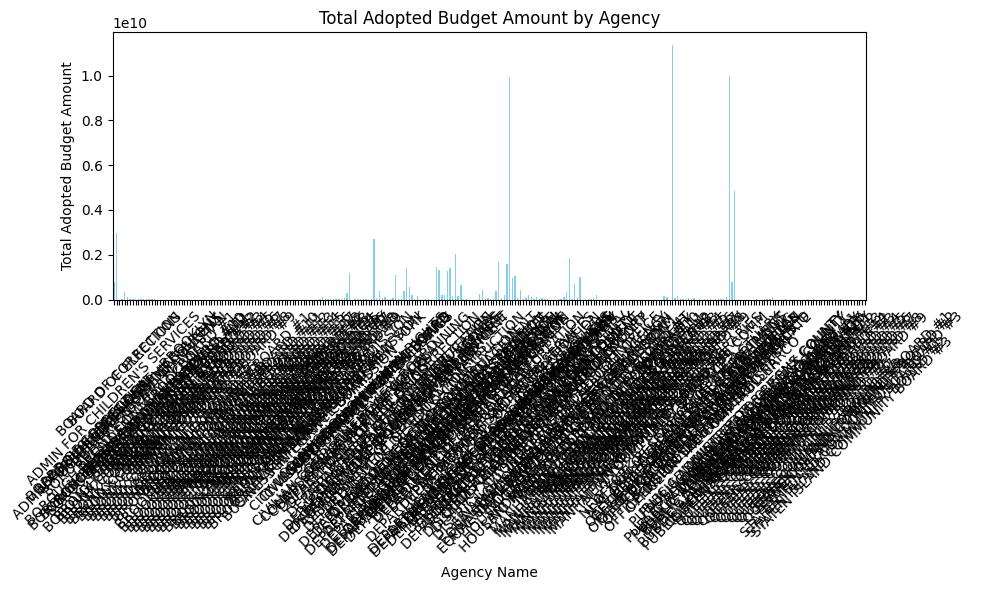

In [10]:
total_adopted_budget_by_agency = df.groupby('Agency Name')['Adopted Budget Amount'].sum()

print(total_adopted_budget_by_agency)

plt.figure(figsize=(10, 6), facecolor='white')
total_adopted_budget_by_agency.plot(kind='bar', color='skyblue')
plt.title('Total Adopted Budget Amount by Agency')
plt.xlabel('Agency Name')
plt.ylabel('Total Adopted Budget Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Agency Name
ADMIN FOR CHILDREN'S SERVICES               432283264.0
ADMIN FOR CHILDREN'S SERVICES                40087366.0
BOARD OF CORRECTION                            341163.0
BOARD OF CORRECTION                             52642.0
BOARD OF ELECTIONS                           24726565.0
                                               ...     
STATEN ISLAND COMMUNITY BOARD #1                 5070.0
STATEN ISLAND COMMUNITY BOARD #2               -46066.0
STATEN ISLAND COMMUNITY BOARD #2                 5070.0
STATEN ISLAND COMMUNITY BOARD #3                -4329.0
STATEN ISLAND COMMUNITY BOARD #3                 5070.0
Name: Budget Difference, Length: 278, dtype: float64


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

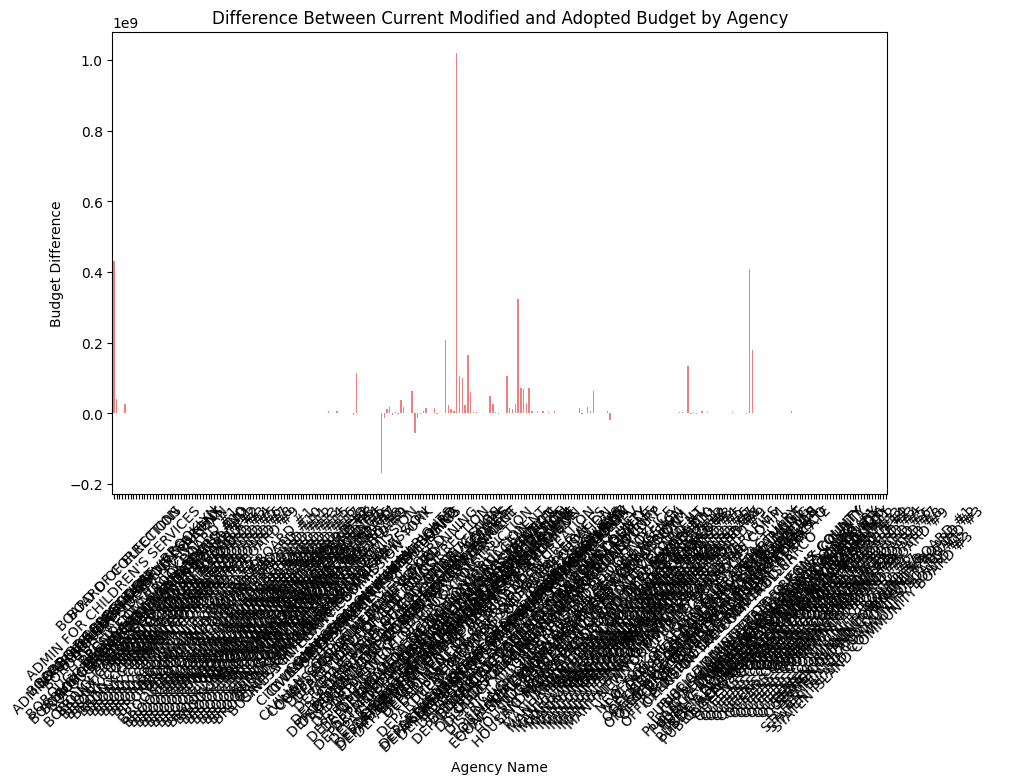

In [11]:
df['Budget Difference'] = df['Current Modified Budget Amount'] - df['Adopted Budget Amount']
budget_difference_by_agency = df.groupby('Agency Name')['Budget Difference'].sum()

print(budget_difference_by_agency)

plt.figure(figsize=(10, 6), facecolor='white')
budget_difference_by_agency.plot(kind='bar', color='lightcoral')
plt.title('Difference Between Current Modified and Adopted Budget by Agency')
plt.xlabel('Agency Name')
plt.ylabel('Budget Difference')
plt.xticks(rotation=45)
plt.tight_layout

In [12]:
total_contracts = df['Current Modified Budget - Number of Contracts'].sum()
print("Total number of contracts across all agencies:", total_contracts)

Total number of contracts across all agencies: 10830.0


In [14]:
top_agencies_by_positions = df.groupby('Agency Name')['Financial Plan Position'].sum().nlargest(5)
print("Top 5 agencies by number of positions in the financial plan:\n", top_agencies_by_positions)

Top 5 agencies by number of positions in the financial plan:
 Agency Name
POLICE DEPARTMENT                           43983.0
FIRE DEPARTMENT                             16851.0
DEPARTMENT OF SOCIAL SERVICES               15254.0
DEPARTMENT OF CORRECTION                    11815.0
DEPARTMENT OF SANITATION                     9967.0
Name: Financial Plan Position, dtype: float64


In [15]:
agency_financial_extremes = df.groupby('Agency Name')['Financial Plan Amount'].agg(['min', 'max'])

print("Minimum and maximum financial plan amount for each agency:\n", agency_financial_extremes)

Minimum and maximum financial plan amount for each agency:
                                                 min          max
Agency Name                                                     
ADMIN FOR CHILDREN'S SERVICES                   0.0   14000000.0
ADMIN FOR CHILDREN'S SERVICES            -6443586.0  416436865.0
BOARD OF CORRECTION                             0.0      36203.0
BOARD OF CORRECTION                             0.0    1603406.0
BOARD OF ELECTIONS                              0.0   33890120.0
...                                             ...          ...
STATEN ISLAND COMMUNITY BOARD #1                0.0     222695.0
STATEN ISLAND COMMUNITY BOARD #2                0.0      45000.0
STATEN ISLAND COMMUNITY BOARD #2                0.0     128695.0
STATEN ISLAND COMMUNITY BOARD #3             1901.0      11269.0
STATEN ISLAND COMMUNITY BOARD #3                0.0     213188.0

[278 rows x 2 columns]
